In [1]:
import numpy as np
import pandas as pd
import time
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data = pd.read_csv('2017EE30515.csv',header=None)

In [3]:
X = data.iloc[:,:784]/255
t = data.iloc[:,784]

In [4]:
X_train = np.array(X[:2700])
X_val = np.array(X[2700:])

t_train = np.array(t[:2700])
t_val = np.array(t[2700:])

t_train_oh = np.zeros((len(t_train),10))
t_val_oh = np.zeros((len(t_val),10))
t_train_oh[np.arange(len(t_train)),t_train] = 1
t_val_oh[np.arange(len(t_val)),t_val] = 1

In [5]:
model = Sequential()
model.add(Dense(units=120, activation='tanh', kernel_initializer='random_normal', bias_initializer='random_normal', input_shape=(784,)))
model.add(Dense(units=10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 120)               94200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1210      
Total params: 95,410
Trainable params: 95,410
Non-trainable params: 0
_________________________________________________________________


In [6]:
gd = optimizers.SGD(lr=0.04)
model.compile(optimizer=gd,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,t_train_oh,batch_size=100,epochs=100,verbose=1,validation_data=(X_val,t_val_oh))

Train on 2700 samples, validate on 300 samples
Epoch 1/100
2700/2700 [==============================] - 2s 773us/step - loss: 1.7784 - acc: 0.4970 - val_loss: 1.2944 - val_acc: 0.7300
Epoch 2/100
2700/2700 [==============================] - 0s 48us/step - loss: 1.0942 - acc: 0.7796 - val_loss: 0.9245 - val_acc: 0.8100
Epoch 3/100
2700/2700 [==============================] - 0s 49us/step - loss: 0.8341 - acc: 0.8259 - val_loss: 0.7675 - val_acc: 0.8400
Epoch 4/100
2700/2700 [==============================] - 0s 48us/step - loss: 0.7024 - acc: 0.8474 - val_loss: 0.6814 - val_acc: 0.8333
Epoch 5/100
2700/2700 [==============================] - 0s 49us/step - loss: 0.6214 - acc: 0.8570 - val_loss: 0.6222 - val_acc: 0.8567
Epoch 6/100
2700/2700 [==============================] - 0s 47us/step - loss: 0.5668 - acc: 0.8674 - val_loss: 0.5867 - val_acc: 0.8633
Epoch 7/100
2700/2700 [==============================] - 0s 50us/step - loss: 0.5261 - acc: 0.8781 - val_loss: 0.5608 - val_acc: 0.8633


2700/2700 [==============================] - 0s 48us/step - loss: 0.1840 - acc: 0.9567 - val_loss: 0.4113 - val_acc: 0.9000
Epoch 61/100
2700/2700 [==============================] - 0s 47us/step - loss: 0.1809 - acc: 0.9600 - val_loss: 0.4127 - val_acc: 0.9033
Epoch 62/100
2700/2700 [==============================] - 0s 46us/step - loss: 0.1796 - acc: 0.9615 - val_loss: 0.4129 - val_acc: 0.9033
Epoch 63/100
2700/2700 [==============================] - 0s 47us/step - loss: 0.1772 - acc: 0.9607 - val_loss: 0.4130 - val_acc: 0.9067
Epoch 64/100
2700/2700 [==============================] - 0s 48us/step - loss: 0.1752 - acc: 0.9596 - val_loss: 0.4118 - val_acc: 0.9033
Epoch 65/100
2700/2700 [==============================] - 0s 48us/step - loss: 0.1734 - acc: 0.9615 - val_loss: 0.4114 - val_acc: 0.9000
Epoch 66/100
2700/2700 [==============================] - 0s 47us/step - loss: 0.1713 - acc: 0.9622 - val_loss: 0.4125 - val_acc: 0.9067
Epoch 67/100
2700/2700 [==============================

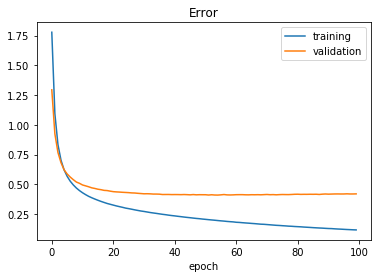

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Error')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

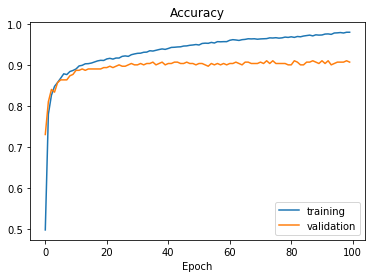

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()